In [2]:
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda
from torch import nn
import matplotlib.pyplot as plt

In [3]:
training_data=datasets.FashionMNIST(root="data", train=True, download=True, transform=ToTensor())
test_data=datasets.FashionMNIST(root="data", train=False, download=True, transform=ToTensor())

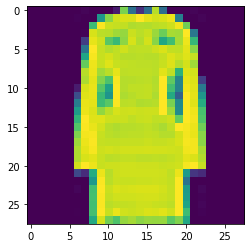

In [4]:
plt.imshow(training_data[500][0][0])

In [5]:
batch_size=64
train_dataloader=DataLoader(training_data, batch_size=batch_size, shuffle=True)
test_dataloader=DataLoader(test_data, batch_size=batch_size, shuffle=True)

In [6]:
for x,y in train_dataloader:
    print(x.shape)
    print(y.shape)
    break

torch.Size([64, 1, 28, 28])
torch.Size([64])


In [7]:
#model

class CNN(nn.Module):
    def __init__(self):
        super(CNN,self).__init__()
        self.flatten=nn.Flatten()
        self.cnn_layers=nn.Sequential(nn.Conv2d(1,4,kernel_size=3, stride=1, padding=1), 
                                      nn.BatchNorm2d(4), 
                                      nn.MaxPool2d(kernel_size=2, stride=2), 
                                      nn.Conv2d(4,4,kernel_size=3, stride=1, padding=1), 
                                      nn.BatchNorm2d(4), 
                                      nn.MaxPool2d(kernel_size=2, stride=2) )
        self.linear_layers=nn.Sequential(nn.Linear(4*7*7, 10))
        
    def forward(self,x):
        x=self.cnn_layers(x)
        x=self.flatten(x)
        return self.linear_layers(x)

model=CNN()
model

CNN(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (cnn_layers): Sequential(
    (0): Conv2d(1, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(4, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(4, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(4, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (linear_layers): Sequential(
    (0): Linear(in_features=196, out_features=10, bias=True)
  )
)

In [8]:
loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(model.parameters(), lr=1e-3)

In [9]:
def train(dataloader, model, loss_fn, optimizer):
    model.train()
    for batch, (x,y) in enumerate(dataloader):
        pred=model(x)
        loss=loss_fn(pred,y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
#         if batch%100==0:
#             print(f"loss: {loss:>7f}")
train(train_dataloader, model, loss_fn, optimizer)

In [10]:
x,y=next(iter(train_dataloader))
x.shape

pred=model(x)
pred.shape

torch.Size([64, 10])

In [11]:
def test(dataloader, model, loss_fn, optimizer):
    size=len(dataloader)*64
    model.eval()
    correct=0
    with torch.no_grad():
        for x,y in dataloader:
            pred=model(x)
#             loss=loss_fn(pred,y)
            correct+=(pred.argmax(1)==y).sum().item()
        accuracy=correct/size
        print(f"Accuracy: {accuracy*100:>5f}")
test(test_dataloader, model, loss_fn, optimizer)

Accuracy: 69.048567


In [ ]:
epochs=10
for i in range(epochs):
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn, optimizer)
print("done")

In [ ]:
torch.save(model.state_dict(), "model.pth")
print("Model saved!!")

In [ ]:

model.load_state_dict(torch.load("model.pth"))
